**Question 1**

In [0]:
import numpy as np
X = np.array([[3,2,1],[2,4,5],[1,2,3],[0,2,5]])
print(X)

[[3 2 1]
 [2 4 5]
 [1 2 3]
 [0 2 5]]


a. Find the sample mean 


In [0]:
X_mean = np.mean(X, axis = 0)
print(X_mean)

[1.5 2.5 3.5]


b. Zero-center the samples, and find the eigenvalues and eigenvectors of the data covariance
matrix Q.

(1) Zero-center the samples

In [0]:
X_original = X.copy()
X = X - X_mean
print(X)

[[ 1.5 -0.5 -2.5]
 [ 0.5  1.5  1.5]
 [-0.5 -0.5 -0.5]
 [-1.5 -0.5  1.5]]


(2) Find the eigenvalues and eigenvectors of the data covariance matrix Q.

In [0]:
Q = 1/4 * np.matmul(X.T,X)  # covariance matrix Q
evalue,evector = np.linalg.eig(Q)
print(evalue)   # eigenvalues  #print(evector)  # eigenvectors(a row is a vector)
evector1 = np.array(evector[:,0])
evector2 = np.array(evector[:,1])
evector3 = np.array(evector[:,2])
evec = np.array([evector1,evector2,evector3])
print(evec)

[3.56166464 1.1733803  0.01495506]
[[-0.45056922  0.19247228  0.87174641]
 [-0.66677184 -0.72187235 -0.18524476]
 [-0.59363515  0.66472154 -0.45358856]]


test property of eigenvectors and eigenvalues

In [0]:
print(np.matmul(Q,evector[:,0]))
print(evalue[0]*evector[:,0])
print(4.74888619/3.56166464)

[-1.60477647  0.68552171  3.10486836]
[-1.60477647  0.68552171  3.10486836]
1.3333333342692253


In [0]:
from sklearn.decomposition import PCA

n_components = min(X.shape[0],X.shape[1])
pca = PCA(n_components=n_components)
pca.fit(X)
e_vectors = pca.components_ # get eignvectors
print('eignvectors:')
print(e_vectors)
e_values = pca.explained_variance_
print('eignvalues:')
print(e_values)

eignvectors:
[[ 0.45056922 -0.19247228 -0.87174641]
 [ 0.66677184  0.72187235  0.18524476]
 [-0.59363515  0.66472154 -0.45358856]]
eignvalues:
[4.74888619 1.56450706 0.01994008]


c. Find the PCA coefficients corresponding to each of the samples in X.

In [0]:
scores = np.matmul(X,evec.T)
print(scores)

[[-2.95145599 -0.17610969 -0.0888421 ]
 [ 1.37104342 -1.69406159  0.0198819 ]
 [-0.30682473  0.78694448  0.19125108]
 [ 1.8872373   1.0832268  -0.12229089]]


d. Reconstruct the original samples from the top two principal components, and report the
reconstruction error for each of the samples.

PCA reconstruction= PC scores * Eigenvectors⊤ + Mean

In [0]:
np.set_printoptions(precision=4)
eigen12 = np.delete(evec, 2, 0)
#print(eigen12)
PC12 = np.delete(scores, 2, 1)
#print(PC12)
recons = np.matmul(PC12,eigen12)+ X_mean 
print(recons)

[[ 2.9473  2.0591  0.9597]
 [ 2.0118  3.9868  5.009 ]
 [ 1.1135  1.8729  3.0867]
 [-0.0726  2.0813  4.9445]]


Reconstruction error

In [0]:
#print(recons-X_original)
RE = np.linalg.norm((recons-X_original),axis=1)
print(RE)

[0.0888 0.0199 0.1913 0.1223]


**Question 3**

Using the Senate Votes dataset demo’ed in Lecture 11, perform k-means clustering
with k = 2 and show that you can learn (most of) the Senators’ parties in a completely
unsupervised manner. Which Senators did your algorithm make a mistake on, and why?

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [0]:
import pandas as pd

url_votes = 'https://raw.githubusercontent.com/exemplary-citizen/PCA-and-Senate-Voting-Data/master/senator_pca_problem/senator_data_pca/'
senator_df =  pd.read_csv(url_votes + 'data_matrix.csv',error_bad_lines=False)
af = pd.read_csv(url_votes + 'politician_labels.txt', header=None)
af["affiliations"] = af[0].str.split().str[-1]

In [0]:
senator_df.head()

,Unnamed: 0,bill_type bill_name bill_ID,missing_votes,Arlen Specter (PA),Barack H. Obama (IL),BarbaraA Mikulski(MD),BarbaraBoxer(CA),Bill Nelson(FL),BlancheL.Lincoln(AR),ByronL.Dorgan(ND),C.SaxbyChambliss(GA),CarlLevin(MI),CharlesE.'Chuck' Grassley(IA),CharlesE.'Chuck'Schumer(NY),CharlesT.'Chuck' Hagel(NE),ChristopherJ.Dodd(CT),ChristopherS.'Kit'Bond(MO),ConradR.Burns(MT),CraigThomas(WY),DanielK.Inouye(HI),DanielKahikinaAkaka(HI),DavidB.Vitter (LA),DebbieAnnStabenow(MI),DianneFeinstein(CA),E. Benjamin'Ben'Nelson(NE),EdwardM.'Ted'Kennedy(MA),ElizabethH.Dole(NC),EvanBayh(IN),FrankR.Lautenberg(NJ),GeorgeFelixAllen(VA),GeorgeV.Voinovich(OH),GordonHaroldSmith(OR),HarryM.Reid(NV),HerbertH.’Herb'Kohl(WI),HillaryRodhamClinton(NY),JamesM.'Jim'Inhofe(OK),JamesM.'Jim'Talent(MO),JamesMerrill'Jim'Jeffords(VT),JeffBingaman(NM),JeffersonB.'Jeff'SessionsIII(AL),...,LisaA.Murkowski(AK),MariaCantwell(WA),MarkDayton(MN),MarkPryor(AR),MaryL.Landrieu(LA),MaxS.Baucus(MT),MelMartinez(FL),MichaelB.Enzi(WY),MichaelD.'Mike'Crapo(ID),Michael'Mike'DeWine(OH),MitchMcConnell(KY),NormColeman(MN),OlympiaJ.Snowe(ME),OrrinG.Hatch(UT),PatRoberts(KS),PatrickJ.Leahy(VT),PattyMurray(WA),PaulS.Sarbanes(MD),PeteV.Domenici(NM),RichardC.Shelby(AL),RichardG.Lugar(IN),RichardJ.'Dick'Durbin(IL),RichardJ.'Rick'Santorum(PA),RichardM.Burr(NC),RobertC.Byrd(WV),RobertF.Bennett(UT),RobertMenendez(NJ),RonWyden(OR),RussellD.Feingold (WI),SamuelD.'Sam'Brownback(KS),SusanM.Collins(ME),TedStevens(AK),ThadCochran(MS),ThomasAllen'Tom'Coburn(OK),ThomasRichardCarper(DE),Thomas'Tom'Harkin(IA),TimP.Johnson(SD),TrentLott(MS),WayneA.Allard(CO),WilliamH.'Bill'Frist(TN)
0,0,Appropriations_Transit Security Amendment_3866,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
1,1,Budget_Spending_and_Taxes_2007 Budget Resoluti...,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
2,2,"""Budget, Spending and Taxes_Debt Limit Increas...",0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
3,3,"""Budget, Spending and Taxes_Education Funding ...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
4,4,"Budget, Spending and Taxes_Reinstate Pay-As-Yo...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0


In [0]:
af.head()

,0,affiliations
0,Specter Red,Red
1,Obama Blue,Blue
2,Mikulski Blue,Blue
3,Boxer Blue,Blue
4,Nelson Blue,Blue


In [0]:
X = np.array(senator_df.values[:, 3:].T, dtype='float64') #transpose to get senators as rows

Check shape of data sets

In [0]:
print(senator_df.shape)
print(af.shape)
#print(af)
#print(af["affiliations"])
print(X.shape)
print(X)

(542, 103)
(100, 2)
(100, 542)
[[ 1.0000  1.0000  1.0000 ...  1.0000  1.0000  1.0000]
 [ 1.0000 -1.0000 -1.0000 ...  0.0000  0.0000  0.0000]
 [ 1.0000 -1.0000 -1.0000 ...  1.0000 -1.0000 -1.0000]
 ...
 [-1.0000  1.0000  1.0000 ...  1.0000  1.0000  1.0000]
 [-1.0000  1.0000  1.0000 ...  0.0000  0.0000  0.0000]
 [-1.0000  1.0000  1.0000 ...  1.0000  1.0000  1.0000]]


Check part of affiliations

In [0]:
affiliations = af["affiliations"]
print(affiliations[30:40])

30      Blue
31      Blue
32       Red
33       Red
34    Yellow
35      Blue
36       Red
37       Red
38       Red
39       Red
Name: affiliations, dtype: object


Visualize affiliations

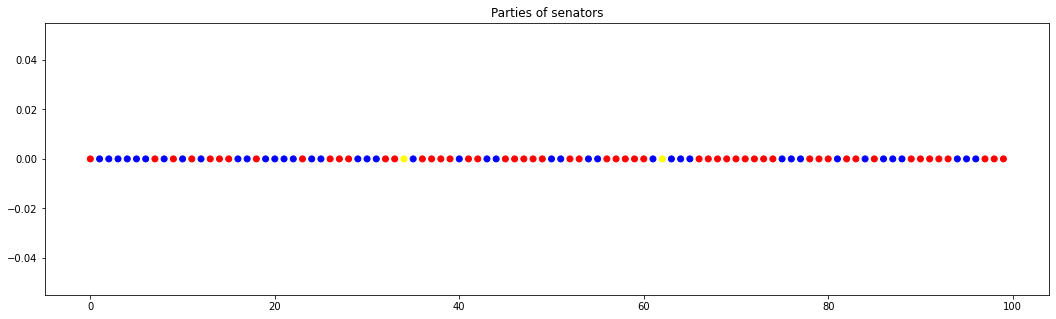

In [0]:
affiliations = af["affiliations"]
senator_num = range(100)
plt.figure(figsize=(18,5))
plt.scatter(senator_num, np.zeros_like(senator_num), c=affiliations)
plt.title('Parties of senators')
plt.show()

Perform k-means clustering with k = 2 and show that you can learn (most of) the Senators’ parties in a completely unsupervised manner.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
labels = kmeans.fit(X).predict(X)
print(labels)

[0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0]


In [0]:
af_kmeans = []
mislabel = []
yellowbabels = []
for i in range(100):
  if labels[i] == 1:
    af_kmeans.append('Blue')
  elif labels[i] == 0:
    af_kmeans.append('Red')
  if af_kmeans[i] != affiliations[i]:
    mislabel.append(i) 
  if affiliations[i] == 'Yellow':
    yellowbabels.append(i)   
print("Senators who are mis labelled: ",mislabel)
print("Among them, these(Yellow) are neither of each label: ",yellowbabels)
for i in mislabel:
  print(af.values[i][0])

Senators who are mis labelled:  [21, 34, 58, 62]
Among them, these(Yellow) are neither of each label:  [34, 62]
Nelson Blue
Jeffords Yellow
Chafee Red
Dayton Yellow


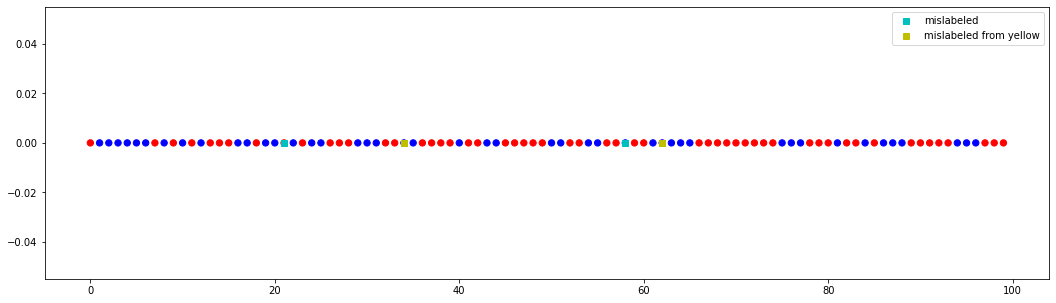

In [0]:
plt.figure(figsize=(18,5))
plt.scatter(senator_num, np.zeros_like(senator_num), c=af_kmeans, s=40, cmap='viridis');
plt.plot(mislabel,np.zeros_like(mislabel),'cs',label='mislabeled')
plt.plot(yellowbabels,np.zeros_like(yellowbabels),'ys',label='mislabeled from yellow')
plt.legend()
plt.show()


Which Senators did your algorithm make a mistake on, and why?

There are two senator originally labelled with 'Yellow', these must be wrong due to only two clusters.

And there are many potential drawbacks of kmeans leading to rest two senators mislabelled: maybe these two are on the boundary of two clusters and they are easily mislabeled, maybe distribution is not spherical.

Try PCA dimension deduction on this dataset and visualize

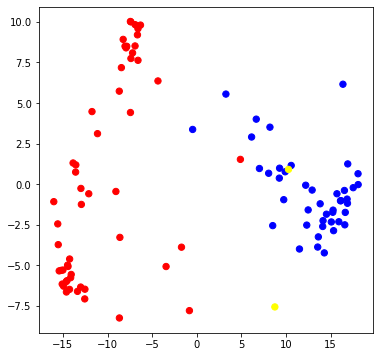

In [0]:
from sklearn.decomposition import PCA
X_mean = np.mean(X, axis = 0)
X_zc = X - X_mean
pca = PCA(n_components=2)
pca.fit(X_zc)
e_vectors = pca.components_ # get eignvectors
#print('eignvectors:')
#print(e_vectors)
scores = np.matmul(X_zc,e_vectors.T)
#print(scores)
plt.figure(figsize=(6,6))
plt.scatter(scores[:,0], scores[:,1], c=affiliations, s=40, cmap='viridis');
# plt.plot(scores[21][0],scores[21][1],'cs')
# plt.plot(scores[58][0],scores[58][1],'cs')
# plt.plot(scores[34][0],scores[34][1],'ys')
# plt.plot(scores[63][0],scores[62][1],'ys')

**Question 4**

**a.** Load the data and construct a table with 9 columns containing the numerical ratings.

import data

In [0]:
import pandas as pd

Ratings =  pd.read_csv('places.csv',error_bad_lines=False)

In [4]:
Ratings.head()

,Place,Climate_and_Terrain,Housing,Health_Care_and_Environment,Crime,Transportation,Education,The_Arts,Recreation,Economics
0,Abilene_TX,521,6200,237,923,4031,2757,996,1405,7633
1,Akron_OH,575,8138,1656,886,4883,2438,5564,2632,4350
2,Albany_GA,468,7339,618,970,2531,2560,237,859,5250
3,Albany-Schenectady-Troy_NY,476,7908,1431,610,6883,3399,4655,1617,5864
4,Albuquerque_NM,659,8393,1853,1483,6558,3026,4496,2612,5727


Extract places and ratings

In [5]:
import numpy as np

place = np.array(Ratings.values[:,0])
print(place[0])
print(place.shape)

ratings = np.array(Ratings.values[:,1:],dtype='float64')
print(ratings[0,:])
print(ratings.shape)

Abilene_TX
(329,)
[ 521. 6200.  237.  923. 4031. 2757.  996. 1405. 7633.]
(329, 9)


**b.** Replace each value in the matrix by its base-10 logarithm. (This pre-processing is done
for convenience since the numerical range of the ratings is large.)

In [6]:
ratings_original = ratings
ratings = np.log10(ratings)
print(ratings[0,:])
print(ratings.shape)

[2.71683772 3.79239169 2.37474835 2.9652017  3.6054128  3.44043677
 2.99825934 3.14767632 3.88269526]
(329, 9)


**c.** Perform PCA on the data. Remember to center the data points first by computing the
mean data vector  and subtracting it from every point. With the centered data matrix, do
an SVD and compute the principal components.

In [0]:
from sklearn.decomposition import PCA

X = ratings
X_mean = np.mean(X, axis = 0)
X_zc = X - X_mean
pca = PCA(n_components=2)
pca.fit(X_zc)
e_vectors = pca.components_ # get eignvectors

**d.** Write down the first two principal components v1 and v2. Provide a qualitative interpretation
of the components. Which among the nine factors do they appear to correlate the
most with?

In [8]:
print('eignvectors:')
print(e_vectors)

eignvectors:
[[ 0.03507288  0.09335159  0.40776448  0.10044536  0.15009714  0.03215319
   0.87434057  0.15899622  0.01949418]
 [ 0.0088782   0.00923057 -0.85853187  0.22042372  0.05920111 -0.06058858
   0.30380632  0.33399255  0.0561011 ]]


principal components(eigenvectors) are shown above, these vectors point the directions datas vary the most.

For first component, 3rd and 7th factors contribute more for it, we can say they are correlated, also we can see 7th factor is much larger than rest, it is dominant, in fact, we could state that based on the correlation of 0.87434057 that this principal component is primarily a measure of the Arts. 3rd factor is Health_Care_and_Environment, 7th factor is The_Arts.

For second component, 3rd factor contributes the most for it. It seems 3rd factor dominate the vector and have small correaltion with other unimportant factors because -0.85853187 is much larger than others. 3rd factor is Health_Care_and_Environment. 

**e.** Project the data points onto the first two principal components. (That is, compute the
highest 2 scores of each of the data points.) Plot the scores as a 2D scatter plot. Which
cities correspond to outliers in this scatter plot?

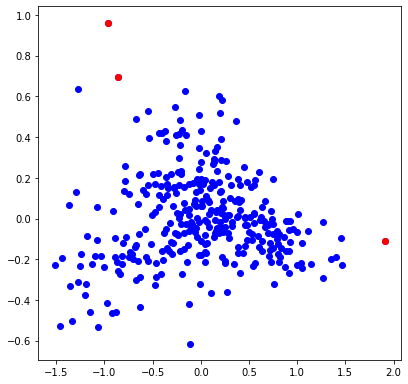

In [12]:
import matplotlib.pyplot as plt
scores = np.matmul(X_zc,e_vectors.T)
s_mean = np.mean(scores,axis=0)
s_std = np.std(scores,axis=0)
outliers = []
for i in range(scores.shape[0]):
  if (scores[i][0] > s_mean[0]+3*s_std[0] or scores[i][0] < s_mean[0]-3*s_std[0]) or (scores[i][1] > s_mean[1]+3*s_std[1] or scores[i][1] < s_mean[1]-3*s_std[1]):
    outliers.append(i)   
plt.figure(figsize=(6.5,6.5))
plt.scatter(scores[:,0],scores[:,1],c='b')
for i in outliers:
  plt.plot(scores[i][0],scores[i][1],'ro')

Print outliers:

In [13]:
for i in outliers:
  print(place[i])

Glens_Falls_NY
Midland_TX
New_York_NY


**f.** Repeat Steps 2-5, but with a slightly different data matrix – instead of computing the
base-10 logarithm, use the z-scores. (The z-score is calculated by computing the mean u
and standard deviation d for each feature, and normalizing each entry x by (x-u)/d ). How
do your answers change?

(1) compute z

In [15]:
np.set_printoptions(precision=4,suppress=True,floatmode = 'fixed')
r_mean = np.mean(ratings_original,axis=0)
r_std = np.std(ratings_original,axis=0)
z = ratings_original
print(ratings_original.shape)
for i in range(329):
  for j in range(9):
    z[i][j] = (z[i][j] - r_mean[j]) / r_std[j]
print(z)

(329, 9)
[[-0.1470 -0.9013 -0.9473 ... -0.4649 -0.5466  1.9464]
 [ 0.3007 -0.0876  0.4696 ...  0.5206  0.9744 -1.0855]
 [-0.5864 -0.4231 -0.5669 ... -0.6286 -1.2235 -0.2543]
 ...
 [ 0.0105  0.0103 -0.4720 ... -0.4593 -1.2446 -0.5351]
 [ 0.2592 -0.5566 -0.0886 ... -0.0763 -0.6433 -1.5066]
 [ 0.5742 -0.1980 -0.9723 ... -0.6534 -1.1504 -0.7678]]


data points are already centered 

(2) Write down the first two principal components v1 and v2. Provide a qualitative interpretation
of the components.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(z)
e_vectors = pca.components_ # get eignvectors
print('eignvectors:')
print(e_vectors)

eignvectors:
[[ 0.2064  0.3565  0.4602  0.2813  0.3512  0.2753  0.4631  0.3279  0.1354]
 [ 0.2178  0.2506 -0.2995  0.3553 -0.1796 -0.4834 -0.1948  0.3845  0.4713]]


Principal components(eigenvectors) are shown above, these vectors point the direction data varies the most.

For first component, factor values are small and close to each others, we can relatively see that 3rd and 7th factors contribute more for it, we can say they are correlated. 3rd factor is Health Care and Environment, 7th factor is The Arts.

For second component, factor values are small and close to each others, we can relatively see that 6th and 9th factors contribute more for it, we can say they are correlated. 6th factor is Education, 9th factor is Economics.

(3) Project the data points onto the first two principal components. (That is, compute the
highest 2 scores of each of the data points.) Plot the scores as a 2D scatter plot. Which
cities correspond to outliers in this scatter plot?

[42, 64, 167, 178, 212, 269, 313]


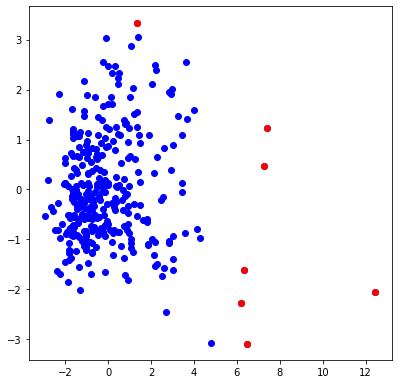

In [17]:
import matplotlib.pyplot as plt
scores = np.matmul(z,e_vectors.T)
s_mean = np.mean(scores,axis=0)
s_std = np.std(scores,axis=0)
outliers = []
for i in range(scores.shape[0]):
  if (scores[i][0] > s_mean[0]+3*s_std[0] or scores[i][0] < s_mean[0]-3*s_std[0]) or (scores[i][1] > s_mean[1]+3*s_std[1] or scores[i][1] < s_mean[1]-3*s_std[1]):
    outliers.append(i)
print(outliers)    
plt.figure(figsize=(6.5,6.5))
plt.scatter(scores[:,0],scores[:,1],c='b')
for i in outliers:
  plt.plot(scores[i][0],scores[i][1],'ro')

Print outliers

In [0]:
for i in outliers:
  print(place[i])

Boston_MA
Chicago_IL
Las_Vegas_NV
Los_Angeles_Long_Beach_CA
New_York_NY
San_Francisco_CA
Washington_DC-MD-VA
